In [1]:
import sys
import os
#sys.path.insert(1, os.path.join(os.path.expanduser('~/.local/lib/python2.7/site-packages/')))
import matplotlib
print(matplotlib.__version__)

1.4.3


In [2]:
import glob, os
import pandas as pd
import csv
import dateutil.parser
%matplotlib inline
import matplotlib
import datetime
import calendar
import calendar
import numpy as np
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')


In [3]:
data_path = "data_commuter/"
allFiles = [file for file in glob.glob(data_path+"*.csv")]
df_list=[pd.read_csv(f, header = 2) for f in allFiles]
df=pd.concat(df_list)
df.rename(columns=lambda x: x.strip(),inplace=True)

In [4]:
print df.columns

Index([u'REMOTE', u'STATION', u'FF', u'SEN/DIS', u'7-D AFAS UNL', u'30-D AFAS/RMF UNL', u'JOINT RR TKT', u'7-D UNL', u'30-D UNL', u'14-D RFM UNL', u'1-D UNL', u'14-D UNL', u'7D-XBUS PASS', u'TCMC', u'RF 2 TRIP', u'RR UNL NO TRADE', u'TCMC ANNUAL MC', u'MR EZPAY EXP', u'MR EZPAY UNL', u'PATH 2-T', u'AIRTRAIN FF', u'AIRTRAIN 30-D', u'AIRTRAIN 10-T', u'AIRTRAIN MTHLY', u'STUDENTS', u''], dtype='object')


In [4]:
df['30_TOT'] = df['30-D AFAS/RMF UNL'] + df['30-D UNL']
df = df.rename(columns={'REMOTE': 'UNIT'})
df = df[['STATION','30_TOT', 'FF']]


In [6]:
print df.head(30)

                           STATION  30_TOT      FF
0   WHITEHALL STREET                 34062   60462
1   CYPRESS HILLS                     1504    3351
2   75TH STREET & ELDERTS LANE        4807    8298
3   85TH STREET & FOREST PKWAY        5498    9484
4   WOODHAVEN BOULEVARD               6574    9209
5   104TH STREET                      3195    6799
6   111TH STREET                      2914    5910
7   121ST STREET                      2905    5344
8   42ND STREET & 8TH AVENUE         60391   95728
9   42ND STREET & 8TH AVENUE         79529  255354
10  34TH STREET & 8TH AVENUE         78919  220805
11  34TH STREET & 8TH AVENUE         31354   46657
12  FULTON STREET                    71467  115015
13  FIFTH AVENUE                     34843   78878
14  LEXINGTON AVENUE                 13427   20721
15  LEXINGTON AVENUE                 64661  104264
16  ROOSEVELT AVE/JACKSON HTS       115700   91508
17  179TH STREET & HILLSIDE AVE      31886   33583
18  47-50 STREETS/ROCKEFELLER  

In [5]:
df.sort(['STATION'], inplace=True)

gb = df.groupby(['STATION']).sum()
gb['RATIO'] = gb['30_TOT'] / gb['FF']

gb.sort(['RATIO'], ascending=False, inplace=True)


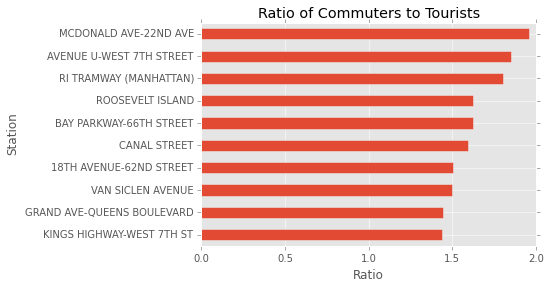

In [9]:
gb_top = gb[:10]
gb_top2 = pd.DataFrame(gb_top, columns=['RATIO'])
gb_top2.sort(['RATIO'], inplace=True)

gb_top2.plot(kind = 'barh', legend=False)
plt.xlabel('Ratio')
plt.ylabel('Station')
plt.title('Ratio of Commuters to Tourists')





In [20]:
print gb_top2.index

Index([u'MCDONALD AVE-22ND AVE         ', u'AVENUE U-WEST 7TH STREET      ', u'RI TRAMWAY (MANHATTAN)        ', u'ROOSEVELT ISLAND              ', u'BAY PARKWAY-66TH STREET       ', u'CANAL STREET                  ', u'18TH AVENUE-62ND STREET       ', u'VAN SICLEN AVENUE             ', u'GRAND AVE-QUEENS BOULEVARD    ', u'KINGS HIGHWAY-WEST 7TH ST     '], dtype='object')


In [ ]:
plt.figure()
gb_top3 = pd.DataFrame(gb, columns = ['RATIO'])
gb_top3.plot(kind='bar', yticks=None, width = 1)



In [ ]:
figure = plt.figure()
barwidth = 0.25
ystep = 10
plt.grid(True)
plt.xlabel('categories')
plt.ylabel('durations in  minutes')
plt.title('durations for categories-created at :'+now)
plt.bar(xdata, ydata, width=barwidth,align='center')
plt.xticks(xdata,catnames,rotation=90)
plt.yticks(range(0,maxduration+ystep,ystep))
plt.xlim([min(xdata) - 0.5, max(xdata) + 0.5])
plt.ylim(0,max(ydata)+ystep)
figure.savefig("myplot.png",format="png")

In [7]:
print df.head(50)
print gb

    UNIT                         STATION  30_TOT      FF
0   R001  WHITEHALL STREET                 34062   60462
0   R001  WHITEHALL STREET                 33662   59573
0   R001  WHITEHALL STREET                 33749   61327
0   R001  WHITEHALL STREET                 33413   61915
1   R003  CYPRESS HILLS                     1504    3351
1   R003  CYPRESS HILLS                     1425    3458
1   R003  CYPRESS HILLS                     1481    3431
1   R003  CYPRESS HILLS                     1501    3515
2   R004  75TH STREET & ELDERTS LANE        4807    8298
2   R004  75TH STREET & ELDERTS LANE        4893    8383
2   R004  75TH STREET & ELDERTS LANE        4755    8458
2   R004  75TH STREET & ELDERTS LANE        4634    8364
3   R005  85TH STREET & FOREST PKWAY        5498    9484
3   R005  85TH STREET & FOREST PKWAY        5585    9459
3   R005  85TH STREET & FOREST PKWAY        5605    9735
3   R005  85TH STREET & FOREST PKWAY        5738    9684
4   R006  WOODHAVEN BOULEVARD  